<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions.

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

In [ ]:
import pandas as pd
heroes = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv")
heroes.shape

(16376, 13)

In [ ]:
import numpy as np

heroes.columns = heroes.columns.str.lower()

heroes.id = heroes.id.str.removesuffix(' Identity')
heroes['align'] = heroes['align'].str.removesuffix(' Characters')
heroes.eye = heroes.eye.str.removesuffix(' Eyes')
heroes.hair = heroes.hair.str.removesuffix(' Hair')
heroes.sex = heroes.sex.str.removesuffix(' Characters')
heroes.alive = heroes.alive.str.removesuffix(' Characters')

heroes.appearances = heroes.appearances.astype('Int64')
heroes.year = heroes.year.astype('Int64')

heroes.head()
# heroes.appearances.unique()
# heroes.info()
for column in heroes.columns:
    print(f"Unique values in '{column}': {heroes[column].unique()}")

Unique values in 'page_id': [  1678   7139  64786 ... 695217 708811 673702]
Unique values in 'name': ['Spider-Man (Peter Parker)' 'Captain America (Steven Rogers)'
 'Wolverine (James \\"Logan\\" Howlett)' ...
 'Tinkerer (Skrull) (Earth-616)' 'TK421 (Spiderling) (Earth-616)'
 'Yologarch (Earth-616)']
Unique values in 'urlslug': ['\\/Spider-Man_(Peter_Parker)' '\\/Captain_America_(Steven_Rogers)'
 '\\/Wolverine_(James_%22Logan%22_Howlett)' ...
 '\\/Tinkerer_(Skrull)_(Earth-616)' '\\/TK421_(Spiderling)_(Earth-616)'
 '\\/Yologarch_(Earth-616)']
Unique values in 'id': ['Secret' 'Public' 'No Dual' 'Known to Authorities' nan]
Unique values in 'align': ['Good' 'Neutral' 'Bad' nan]
Unique values in 'eye': ['Hazel' 'Blue' 'Brown' 'Green' 'Grey' 'Yellow' 'Gold' 'Red'
 'Black Eyeballs' 'Amber' 'Variable' nan 'Black' 'White' 'Orange' 'Silver'
 'Purple' 'Pink' 'One Eye' 'Violet' 'Multiple' 'Magenta' 'Yellow Eyeballs'
 'No' 'Compound']
Unique values in 'hair': ['Brown' 'White' 'Black' 'Blond' 'No' 'B

In [ ]:
heroes.eye.value_counts()

Blue               1962
Brown              1924
Green               613
Black               555
Red                 508
White               400
Yellow              256
Grey                 95
Hazel                76
Variable             49
Purple               31
Orange               25
Pink                 21
One Eye              21
Gold                 14
Silver               12
Violet               11
Amber                10
Multiple              7
No                    7
Yellow Eyeballs       6
Black Eyeballs        3
Magenta               2
Compound              1
Name: eye, dtype: int64

## Q1. How big is this dataset?
Use pandas to find out the number of rows and columns.

In [ ]:
heroes.shape

(16376, 13)

## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Appearances by Sex')

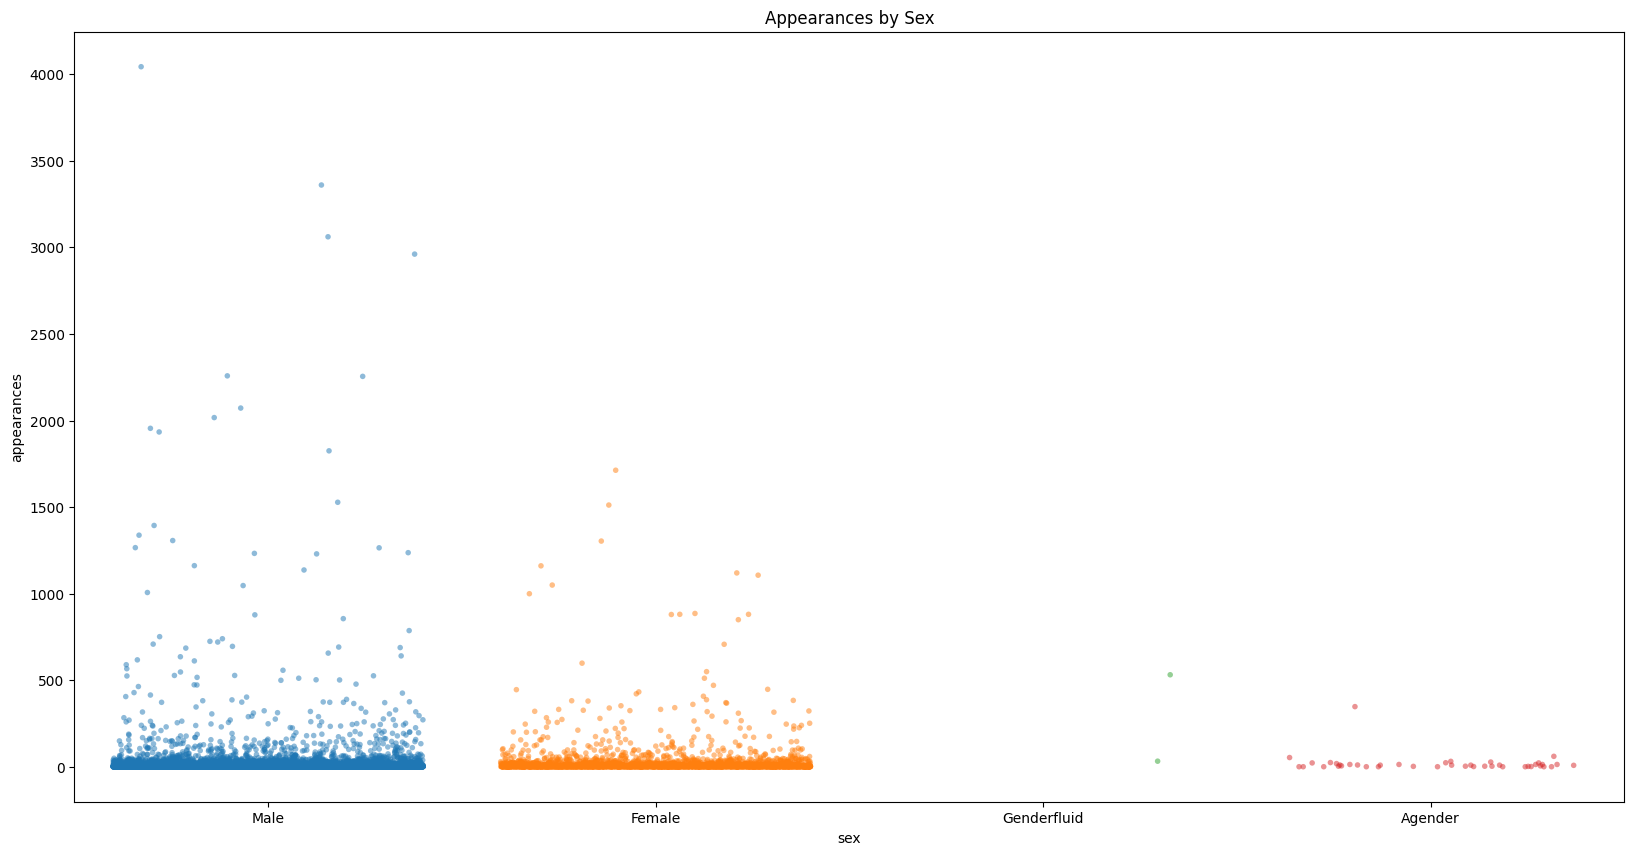

In [ ]:
# what is character apperances distribution by sex?
plt.figure(figsize=(20, 10))

sns.stripplot(data=heroes,
              x= "sex",
              y = 'appearances',
              size = 4,
              alpha = 0.5,
              hue = 'sex',
              jitter = 0.4,
              legend = False
)
plt.title('Appearances by Sex')

## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

Text(0.5, 0.98, 'Align by Years')

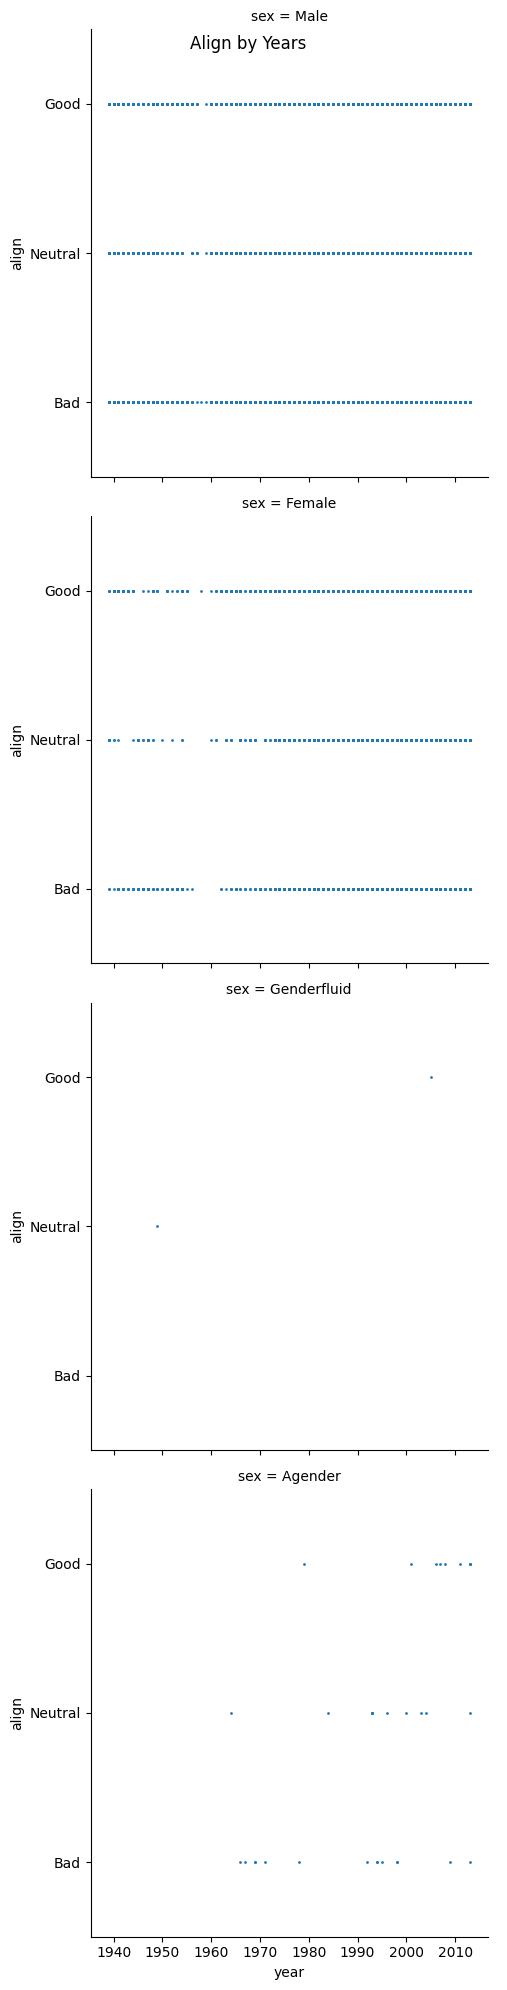

In [ ]:
# how are bad/good guys distributed over the years and genders

ax = sns.catplot(data=heroes,
              x = "year",
              y = "align",
              row = 'sex',
              dodge = True,
              jitter = False,
              size = 2,
)

ax.fig.suptitle("Align by Years")
# plt.title('Align by Year')

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

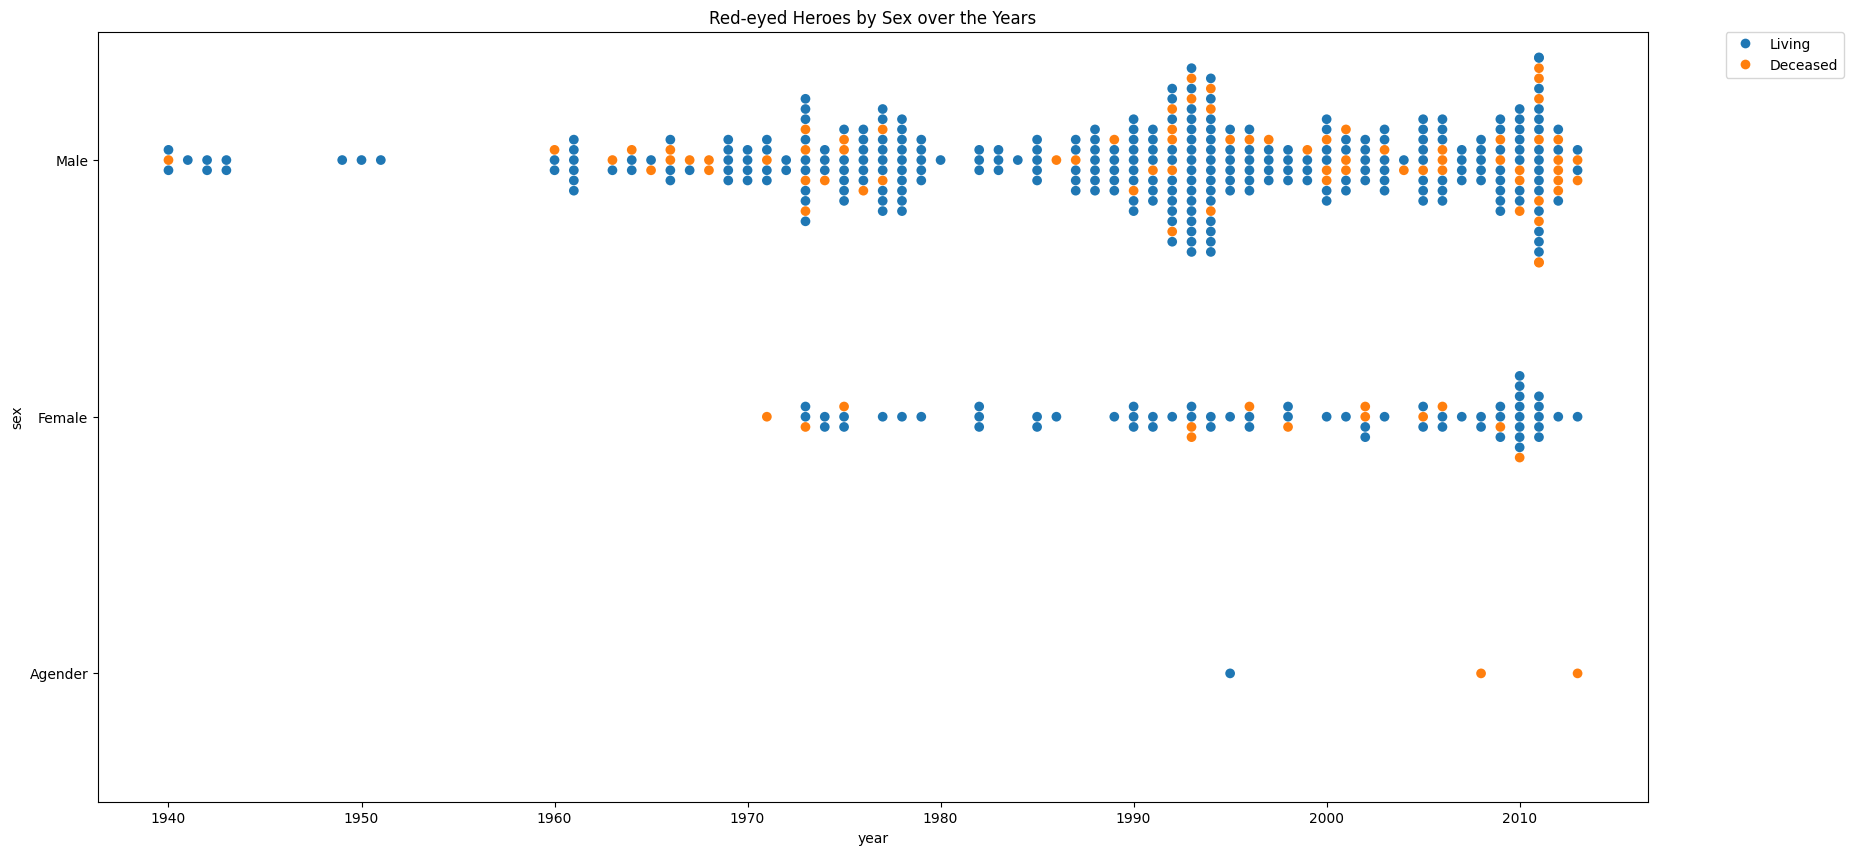

In [ ]:
# whats the distribution of red eyed charachters by sex and years?

plt.figure(figsize=(20, 10))

sns.swarmplot(data = heroes[heroes.eye == 'Red'],
              x = 'year',
              y = 'sex',
              hue = 'alive',
              size = 7
)
plt.title('Red-eyed Heroes by Sex over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

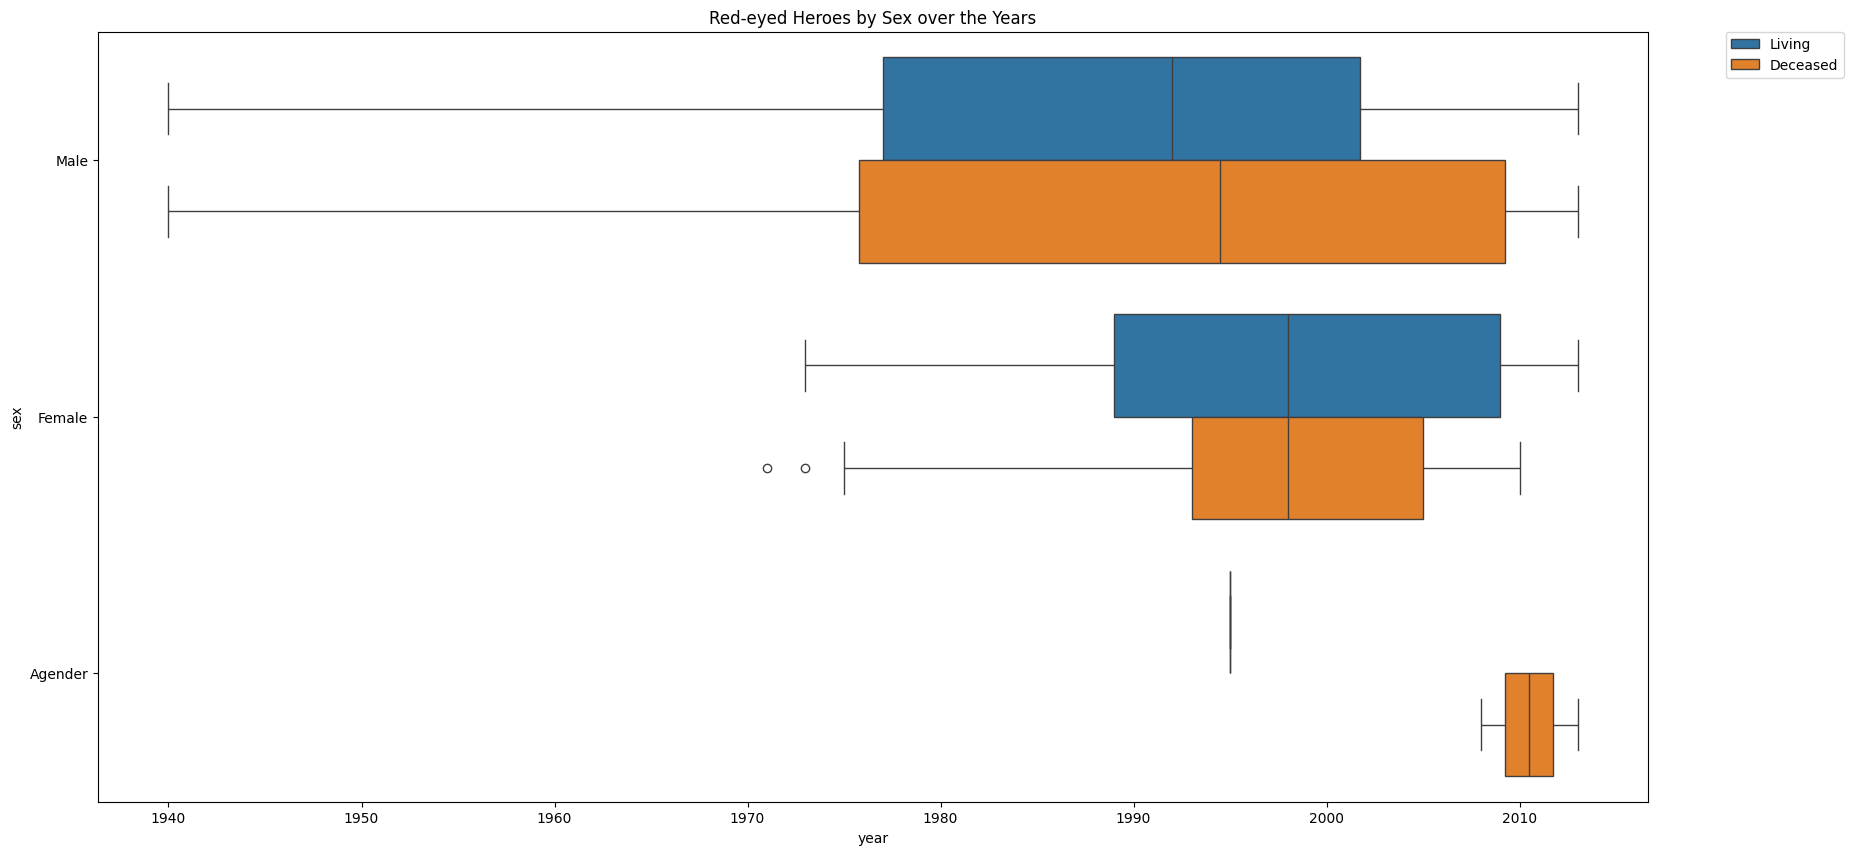

In [ ]:
# kind = 'box' did not work for sns.swarmplot, I had to change it to sns.boxplot
plt.figure(figsize=(20, 10))

sns.boxplot(data = heroes[heroes.eye == 'Red'],
            x = 'year',
            y = 'sex',
            hue = 'alive',

            # kind = 'box'
)

plt.title('Red-eyed Heroes by Sex over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

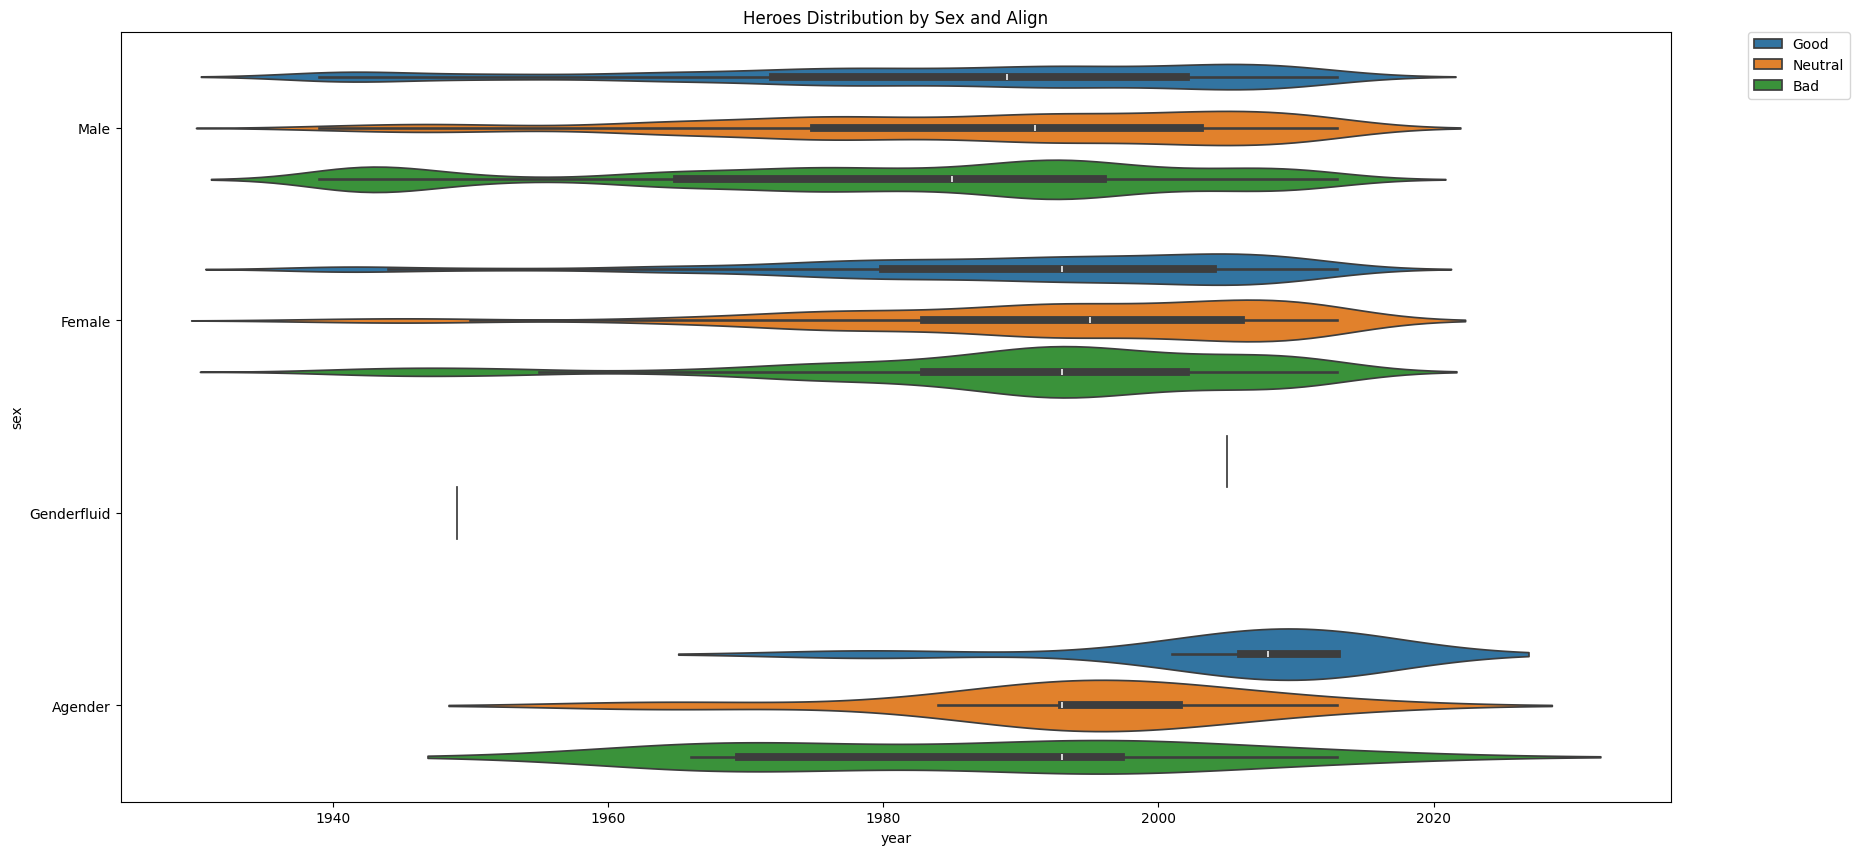

In [ ]:
# whats the distribution of align by sex over years?

plt.figure(figsize=(20, 10))

sns.violinplot(data = heroes,
              x = 'year',
              y = 'sex',
              hue = 'align'
)
plt.title('Heroes Distribution by Sex and Align')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Bonus:
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories.

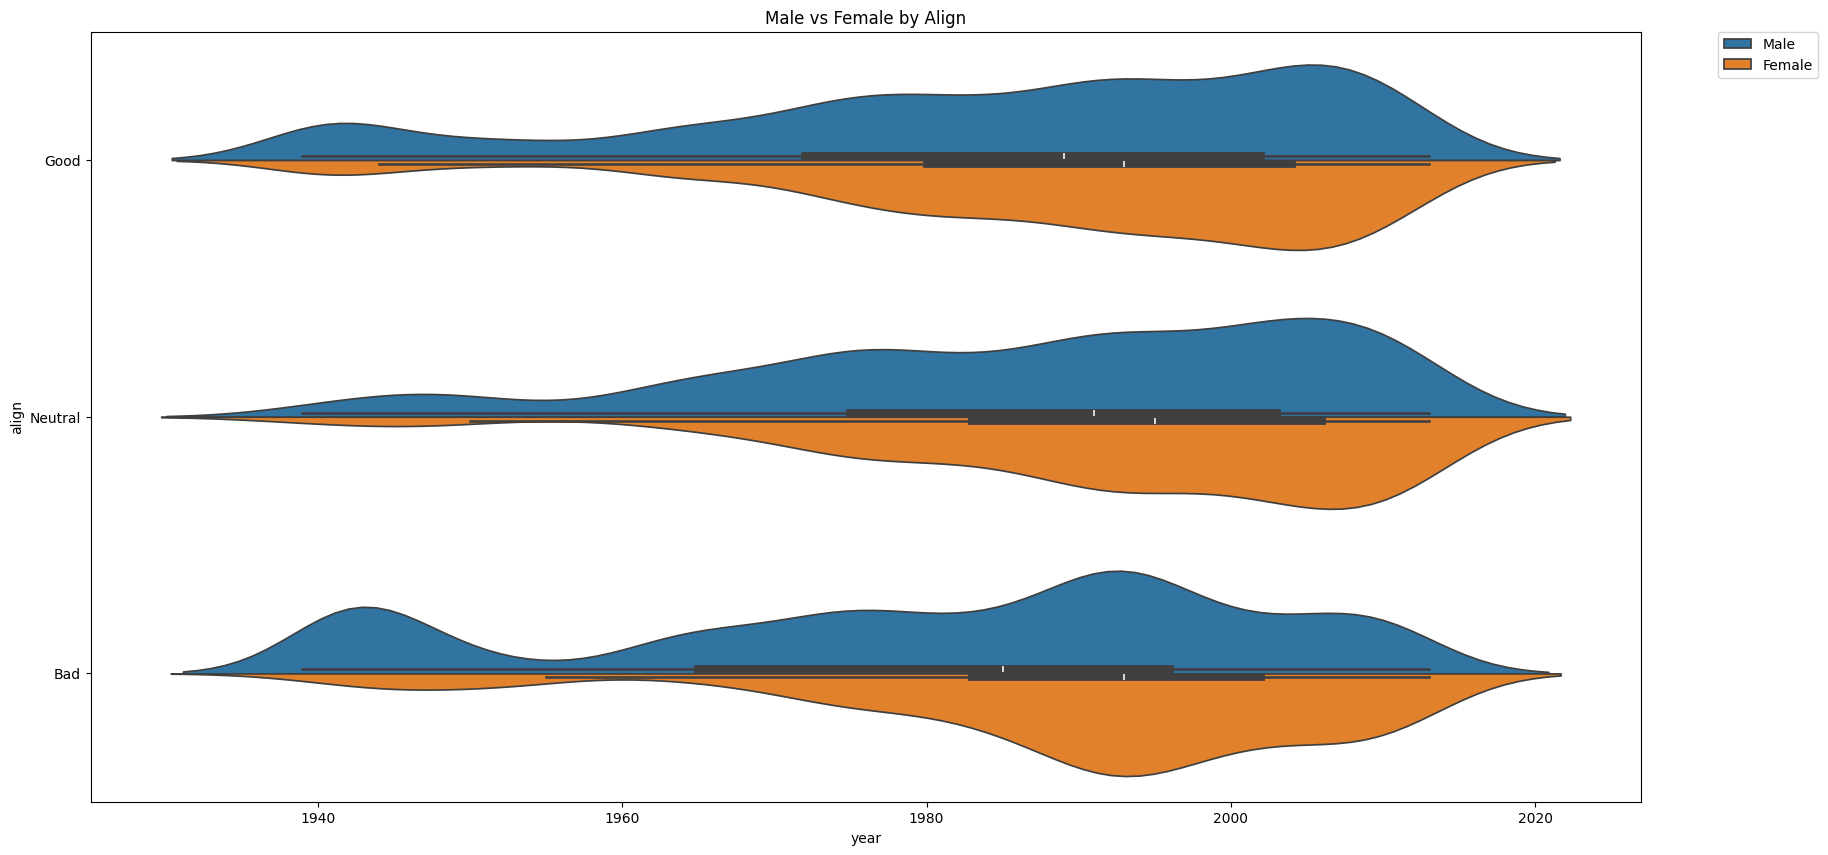

In [ ]:
# whats the distribution of align by sex over years?

plt.figure(figsize=(20, 10))

sns.violinplot(data = heroes[(heroes.sex == 'Male') | (heroes.sex == 'Female')],
              x = 'year',
              y = 'align',
              hue = 'sex',
              split = True
)
plt.title('Male vs Female by Align')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

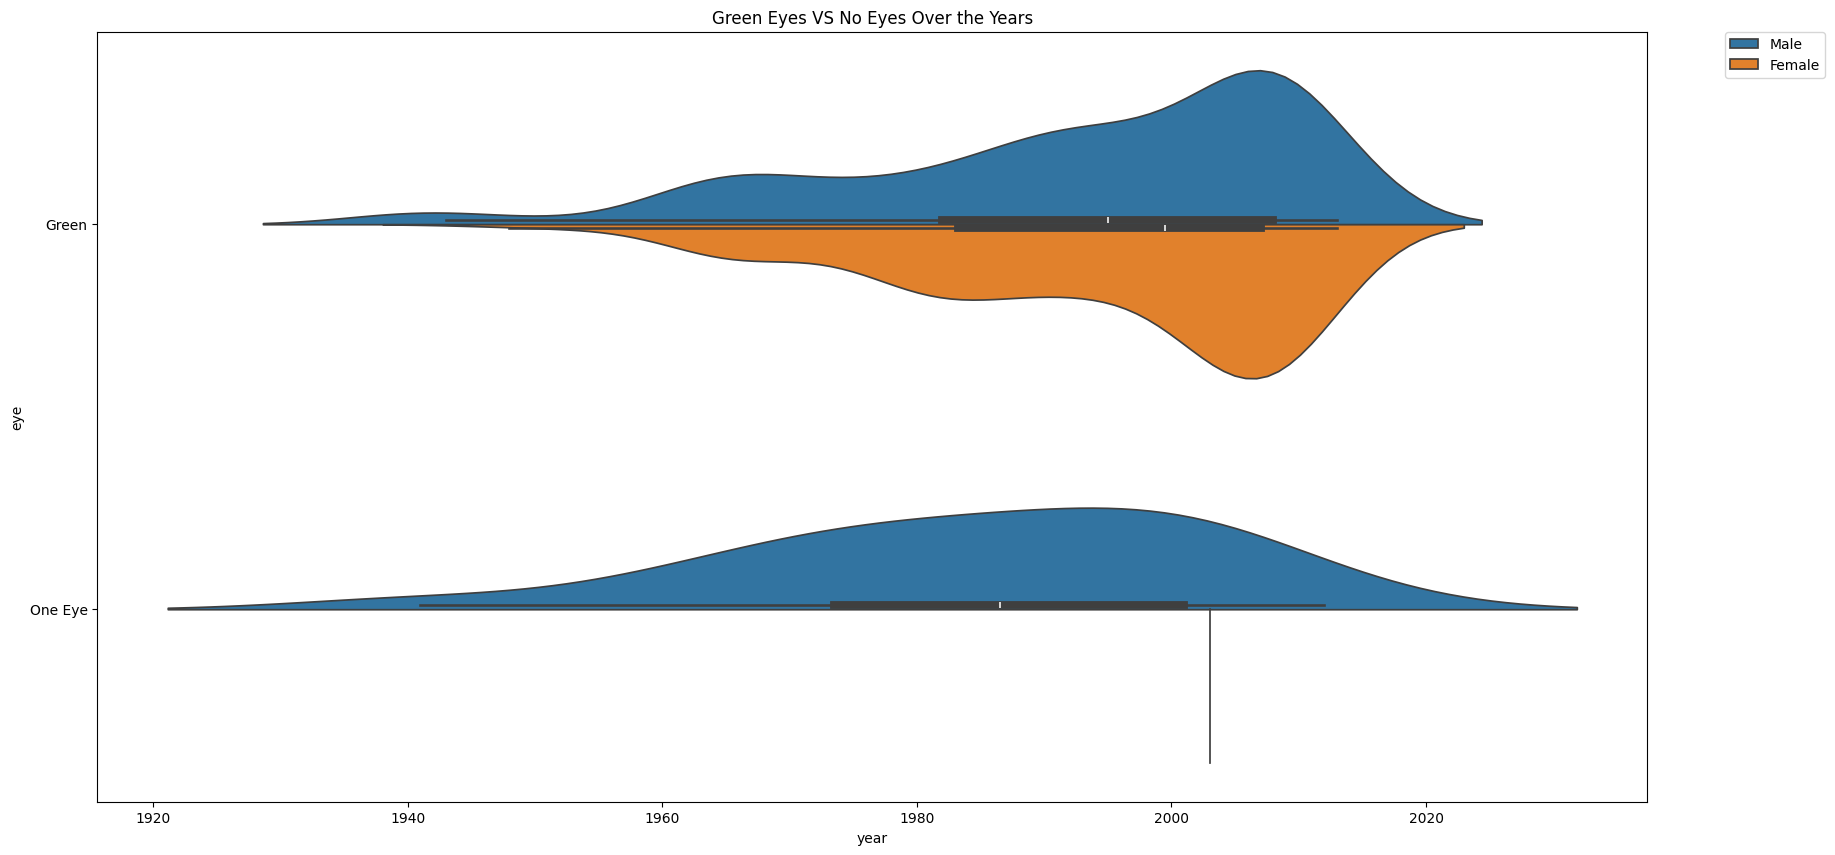

In [ ]:
# whats the distribution of one eye and green eyes by sex over years?

plt.figure(figsize=(20, 10))

sns.violinplot(data = heroes[((heroes.eye == 'Green') | (heroes.eye == 'One Eye')) &
                             ((heroes.sex == 'Male') | (heroes.sex == 'Female'))],
              x = 'year',
              y = 'eye',
              hue = 'sex',
              split = True
)
plt.title('Green Eyes VS No Eyes Over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
heroes.groupby('eye').sex.value_counts()

# eye.value_counts()

eye              sex        
Amber            Male              8
                 Female            2
Black            Male            394
                 Female          137
                 Agender           4
Black Eyeballs   Female            2
                 Male              1
Blue             Male           1258
                 Female          692
                 Agender           1
Brown            Male           1400
                 Female          519
                 Agender           1
                 Genderfluid       1
Compound         Male              1
Gold             Male             10
                 Female            3
Green            Male            328
                 Female          268
                 Agender           3
                 Genderfluid       1
Grey             Male             75
                 Female           20
Hazel            Male             58
                 Female           17
Magenta          Female            2
Multiple 